In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import sklearn
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from matplotlib.colors import ListedColormap

In [4]:
df = pd.read_csv(r"C:\Users\lily\Desktop\IT alapok privát\PRIV DATA SC 1204\Machine learning\travel.csv")

***Sanity check***

In [5]:
df.tail()

,Unnamed: 0,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
99995,18926976,2013-03-31 16:45:01,2,3,66,351,21609,1386.4061,858268,0,...,0,1,762,6,0,1,2,50,503,91
99996,2700011,2013-09-29 14:09:07,2,3,66,462,49272,698.1395,957708,0,...,0,1,12843,5,0,1,2,50,661,6
99997,35620410,2014-07-11 22:05:54,37,1,69,998,52849,NaN,814512,1,...,0,3,18773,1,0,1,6,22,1794,38
99998,25735008,2013-07-02 01:03:12,2,3,66,246,28491,207.2549,881704,0,...,0,1,8859,1,0,1,2,50,212,89
99999,1792721,2014-12-19 19:59:12,11,3,205,354,53478,1198.4359,845482,0,...,1,1,11848,1,0,1,2,50,705,42


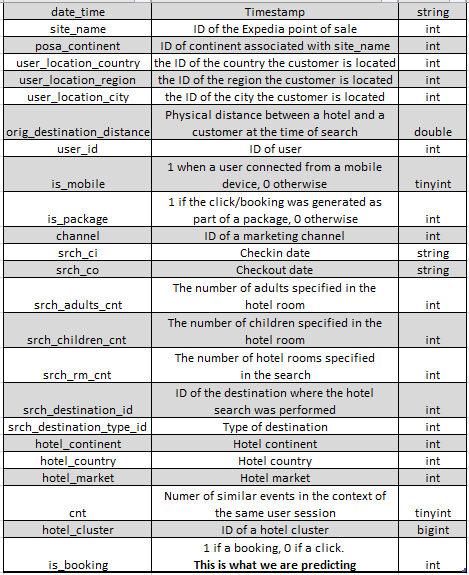

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Unnamed: 0                 100000 non-null  int64  
 1   date_time                  100000 non-null  object 
 2   site_name                  100000 non-null  int64  
 3   posa_continent             100000 non-null  int64  
 4   user_location_country      100000 non-null  int64  
 5   user_location_region       100000 non-null  int64  
 6   user_location_city         100000 non-null  int64  
 7   orig_destination_distance  63915 non-null   float64
 8   user_id                    100000 non-null  int64  
 9   is_mobile                  100000 non-null  int64  
 10  is_package                 100000 non-null  int64  
 11  channel                    100000 non-null  int64  
 12  srch_ci                    99878 non-null   object 
 13  srch_co                    998

***Observation: orig_destination_distance has quite high number of missing values, that can be considered for dropping, check in and check out can be handled. Also some of the datatypes needs to be changed - date_time, checkin, checkout to dates.***


In [7]:
df.isnull().sum()/len(df)

Unnamed: 0                   0.00000
date_time                    0.00000
site_name                    0.00000
posa_continent               0.00000
user_location_country        0.00000
user_location_region         0.00000
user_location_city           0.00000
orig_destination_distance    0.36085
user_id                      0.00000
is_mobile                    0.00000
is_package                   0.00000
channel                      0.00000
srch_ci                      0.00122
srch_co                      0.00122
srch_adults_cnt              0.00000
srch_children_cnt            0.00000
srch_rm_cnt                  0.00000
srch_destination_id          0.00000
srch_destination_type_id     0.00000
is_booking                   0.00000
cnt                          0.00000
hotel_continent              0.00000
hotel_country                0.00000
hotel_market                 0.00000
hotel_cluster                0.00000
dtype: float64

In [8]:
df.duplicated().sum()

0

In [9]:
df.describe()

,Unnamed: 0,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,63915.000000,1.000000e+05,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.882530e+07,9.838570,2.678150,85.995070,308.636990,27676.391240,1960.661721,6.054383e+05,0.133770,0.248140,...,0.336750,1.111750,14426.32738,2.577290,0.079930,1.487980,3.150920,81.093290,598.848330,49.860370
std,1.086183e+07,11.996426,0.749018,59.292002,208.706581,16768.647409,2228.153377,3.516154e+05,0.340407,0.431936,...,0.734449,0.451602,11036.98122,2.149263,0.271186,1.280262,1.620534,56.111519,510.959297,28.885423
min,1.012000e+03,2.000000,0.000000,0.000000,0.000000,0.000000,0.005600,1.400000e+01,0.000000,0.000000,...,0.000000,0.000000,4.00000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,9.448967e+06,2.000000,3.000000,66.000000,174.000000,12949.000000,312.792100,2.987962e+05,0.000000,0.000000,...,0.000000,1.000000,8267.00000,1.000000,0.000000,1.000000,2.000000,50.000000,158.000000,25.000000
50%,1.881212e+07,2.000000,3.000000,66.000000,314.000000,27655.000000,1131.835300,6.028825e+05,0.000000,0.000000,...,0.000000,1.000000,9145.00000,1.000000,0.000000,1.000000,2.000000,50.000000,591.000000,49.000000
75%,2.825307e+07,15.000000,3.000000,70.000000,385.000000,42328.000000,2542.359350,9.157222e+05,0.000000,0.000000,...,0.000000,1.000000,18784.00000,5.000000,0.000000,2.000000,4.000000,106.000000,701.000000,73.000000
max,3.767009e+07,53.000000,4.000000,239.000000,1025.000000,56507.000000,11965.376100,1.198783e+06,1.000000,1.000000,...,9.000000,8.000000,65035.00000,9.000000,1.000000,120.000000,6.000000,212.000000,2117.000000,99.000000


In [10]:
df1 = df.copy()

***Dropping***

In [11]:
df1.drop('orig_destination_distance', axis=1, inplace=True)

***Convert to data_time***

In [12]:
df1['srch_co'] = pd.to_datetime(df1['srch_co'])

In [13]:
df1['srch_ci'] = pd.to_datetime(df1['srch_ci'])

In [14]:
df1['date_time'] = pd.to_datetime(df1['date_time'])

In [15]:
df1['date_time'] = df1['date_time'].apply(lambda x: x.date())

In [16]:
df1['date_time'] = pd.to_datetime(df1['date_time'])

In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   Unnamed: 0                100000 non-null  int64         
 1   date_time                 100000 non-null  datetime64[ns]
 2   site_name                 100000 non-null  int64         
 3   posa_continent            100000 non-null  int64         
 4   user_location_country     100000 non-null  int64         
 5   user_location_region      100000 non-null  int64         
 6   user_location_city        100000 non-null  int64         
 7   user_id                   100000 non-null  int64         
 8   is_mobile                 100000 non-null  int64         
 9   is_package                100000 non-null  int64         
 10  channel                   100000 non-null  int64         
 11  srch_ci                   99878 non-null   datetime64[ns]
 12  src

***Handling missing values***

In [18]:
df1.sort_values(by ='date_time', ascending=False, inplace=True)

In [19]:
df1['lin_intpo__ci'] = df1['srch_ci'].interpolate(method='linear')

In [20]:
df1['srch_ci_back'] = df1['srch_ci'].bfill()

In [21]:
df1['srch_ci_forw'] = df1['srch_ci'].ffill()

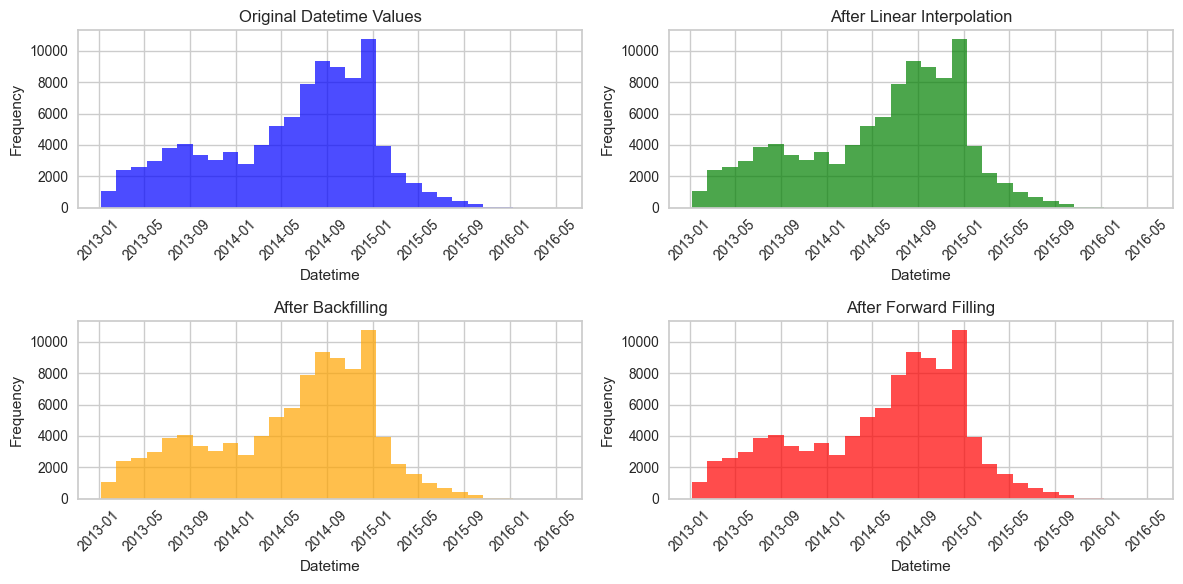

In [22]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.hist(df1['srch_ci'].dropna(), bins=30, color='blue', alpha=0.7)
plt.title('Original Datetime Values')
plt.xticks(rotation=45)
plt.xlabel('Datetime')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
plt.hist(df1['lin_intpo__ci'].interpolate(method='linear'), bins=30, color='green', alpha=0.7)
plt.title('After Linear Interpolation')
plt.xticks(rotation=45)
plt.xlabel('Datetime')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
plt.hist(df1['srch_ci_back'].fillna(method='bfill'), bins=30, color='orange', alpha=0.7)
plt.title('After Backfilling')
plt.xticks(rotation=45)
plt.xlabel('Datetime')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
plt.hist(df1['srch_ci_forw'].fillna(method='ffill'), bins=30, color='red', alpha=0.7)
plt.title('After Forward Filling')
plt.xticks(rotation=45)
plt.xlabel('Datetime')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

***Comment: since no big difference, will choose bfill.***

In [23]:
df1['srch_co_back'] = df1['srch_co'].bfill()

In [24]:
df1.drop(['lin_intpo__ci', 'srch_ci_forw', 'srch_ci', 'srch_co'], axis=1, inplace=True )

### EDA 

In [25]:
df1.groupby('hotel_country')['user_id'].count().to_frame().sort_values(by='user_id')

,user_id
hotel_country,
59,1
167,1
16,1
101,1
95,1
...,...
70,3192
105,3593
198,4681


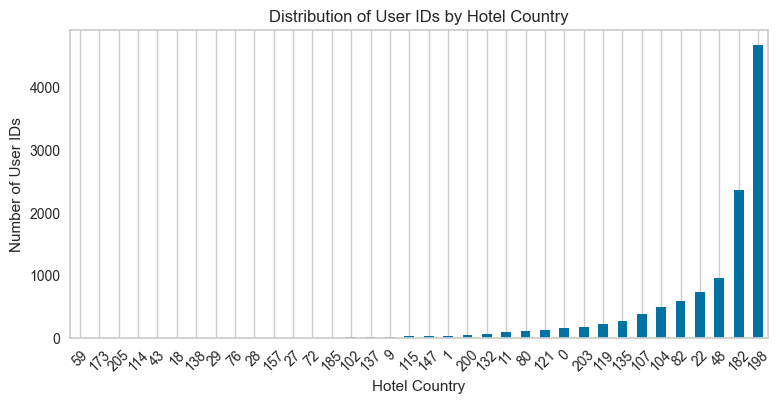

In [26]:
country_counts = df1.groupby('hotel_country')['user_id'].count().sort_values()
n = 5  
selected_countries = country_counts.iloc[::n]

plt.figure(figsize=(9,4))
selected_countries.plot(kind='bar')
plt.title('Distribution of User IDs by Hotel Country')
plt.xlabel('Hotel Country')
plt.ylabel('Number of User IDs')
plt.xticks(rotation=45)  
plt.grid(axis='y') 
plt.show()

In [27]:
df1['is_booking'].value_counts()

is_booking
0    92007
1     7993
Name: count, dtype: int64

Text(0, 0.5, 'Count')

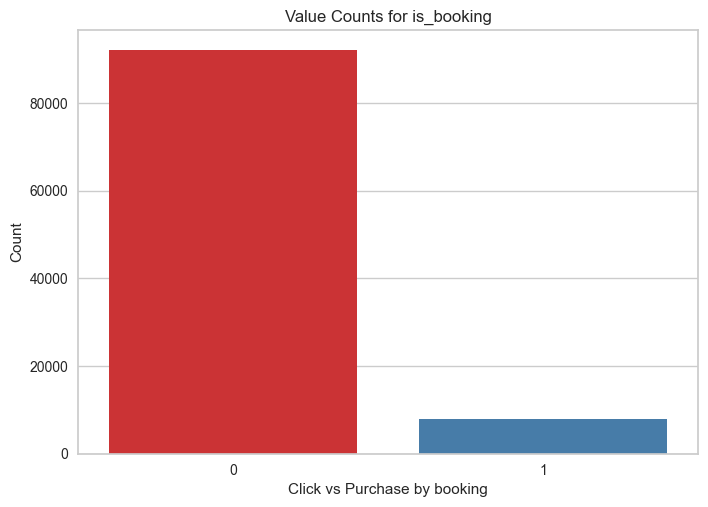

In [28]:
sns.countplot(data=df1, x='is_booking', palette='Set1')
plt.title('Value Counts for is_booking')
plt.xlabel('Click vs Purchase by booking')
plt.ylabel('Count')

In [29]:
df1.groupby('channel')['is_booking'].size().to_frame().sort_values(by='is_booking', ascending=True)

,is_booking
channel,
10,15
6,162
8,271
7,811
4,2194
3,4404
5,6158
2,7836
1,10274


In [30]:
booking_summary = df1.groupby('channel')['is_booking'].agg(['count', 'sum'])

In [31]:
booking_summary['booking_rate'] = booking_summary['sum'] / booking_summary['count']

In [32]:
pd.DataFrame(booking_summary).sort_values(by='booking_rate', ascending=True)

,count,sum,booking_rate
channel,,,
7,811,35,0.043157
8,271,15,0.055351
3,4404,266,0.060400
2,7836,474,0.060490
6,162,11,0.067901
1,10274,716,0.069690
0,12523,901,0.071948
9,55352,4726,0.085381
5,6158,581,0.094349


### Feature engineering

In [33]:
df1['Between search and checkin'] = (df1['date_time'] - df1['srch_ci_back']).dt.days

***Let's encode the date_time datatypes into 4 seasons***

In [34]:
def get_season(month):
    if month in [12, 1, 2]:  
        return 'winter'
    elif month in [3, 4, 5]: 
        return 'spring'
    elif month in [6, 7, 8]: 
        return 'summer'
    else:  
        return 'fall'

In [35]:
for col in ['date_time']:
    df1[col + '_season'] = pd.to_datetime(df1[col]).dt.month.map(get_season)

In [36]:
df1.drop(['date_time', 'srch_ci_back', 'srch_co_back'], axis=1, inplace=True)

In [37]:
df1 = pd.get_dummies(df1, columns=['date_time_season'])

In [38]:
df1.columns

Index(['Unnamed: 0', 'site_name', 'posa_continent', 'user_location_country',
       'user_location_region', 'user_location_city', 'user_id', 'is_mobile',
       'is_package', 'channel', 'srch_adults_cnt', 'srch_children_cnt',
       'srch_rm_cnt', 'srch_destination_id', 'srch_destination_type_id',
       'is_booking', 'cnt', 'hotel_continent', 'hotel_country', 'hotel_market',
       'hotel_cluster', 'Between search and checkin', 'date_time_season_fall',
       'date_time_season_spring', 'date_time_season_summer',
       'date_time_season_winter'],
      dtype='object')

In [39]:
df1[['date_time_season_fall', 'date_time_season_spring',
       'date_time_season_summer', 'date_time_season_winter']] = df1[['date_time_season_fall', 'date_time_season_spring',
       'date_time_season_summer', 'date_time_season_winter',]].replace({True: 1, False:0})

In [40]:
df1

,Unnamed: 0,site_name,posa_continent,user_location_country,user_location_region,user_location_city,user_id,is_mobile,is_package,channel,...,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster,Between search and checkin,date_time_season_fall,date_time_season_spring,date_time_season_summer,date_time_season_winter
23316,34781476,2,3,66,311,38374,97848,1,1,9,...,1,4,47,1508,65,-56,0,0,0,1
3383,25738657,18,2,119,0,27731,893772,0,0,9,...,1,3,99,88,12,-7,0,0,0,1
20603,34948085,8,4,77,401,152,669618,0,1,3,...,2,3,171,61,58,-163,0,0,0,1
7500,36852877,34,3,66,337,22666,687459,0,0,9,...,1,2,198,397,6,-3,0,0,0,1
63718,20048592,34,3,205,354,42722,325348,0,0,7,...,1,2,50,656,48,-110,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60305,30774856,2,3,66,294,52464,209958,0,0,9,...,4,2,50,1230,39,-36,0,0,0,1
7045,23920106,2,3,66,174,18354,551265,1,1,9,...,1,4,8,118,44,-159,0,0,0,1
28672,19085762,2,3,66,348,45247,66191,0,1,1,...,1,4,8,126,65,-34,0,0,0,1
30731,29100268,37,1,69,923,54910,727741,0,1,1,...,1,5,194,1528,64,-85,0,0,0,1


In [41]:
df1.columns

Index(['Unnamed: 0', 'site_name', 'posa_continent', 'user_location_country',
       'user_location_region', 'user_location_city', 'user_id', 'is_mobile',
       'is_package', 'channel', 'srch_adults_cnt', 'srch_children_cnt',
       'srch_rm_cnt', 'srch_destination_id', 'srch_destination_type_id',
       'is_booking', 'cnt', 'hotel_continent', 'hotel_country', 'hotel_market',
       'hotel_cluster', 'Between search and checkin', 'date_time_season_fall',
       'date_time_season_spring', 'date_time_season_summer',
       'date_time_season_winter'],
      dtype='object')

In [42]:
df2 = df1.copy()

In [43]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 23316 to 42499
Data columns (total 26 columns):
 #   Column                      Non-Null Count   Dtype
---  ------                      --------------   -----
 0   Unnamed: 0                  100000 non-null  int64
 1   site_name                   100000 non-null  int64
 2   posa_continent              100000 non-null  int64
 3   user_location_country       100000 non-null  int64
 4   user_location_region        100000 non-null  int64
 5   user_location_city          100000 non-null  int64
 6   user_id                     100000 non-null  int64
 7   is_mobile                   100000 non-null  int64
 8   is_package                  100000 non-null  int64
 9   channel                     100000 non-null  int64
 10  srch_adults_cnt             100000 non-null  int64
 11  srch_children_cnt           100000 non-null  int64
 12  srch_rm_cnt                 100000 non-null  int64
 13  srch_destination_id         100000 non-null  i

In [44]:
corr_1 = df2.corr()

<AxesSubplot: >

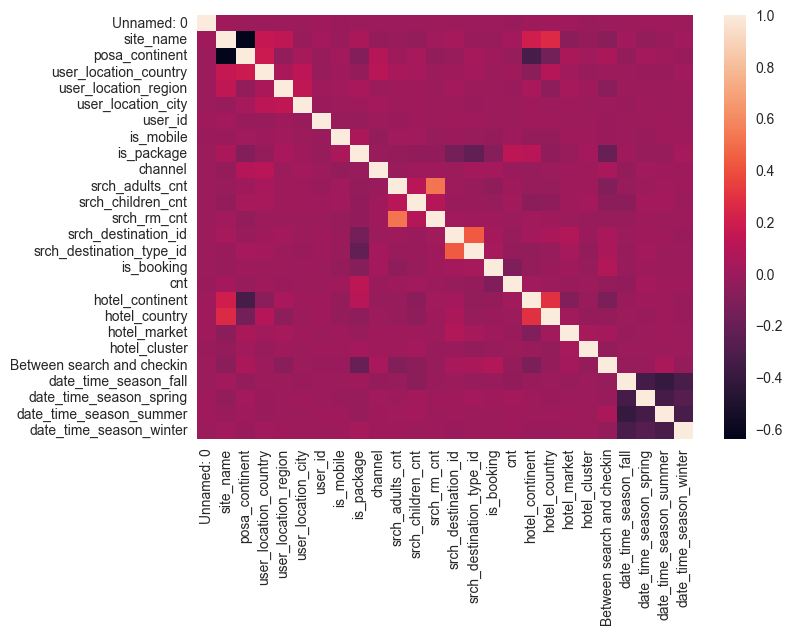

In [45]:
sns.heatmap(corr_1, annot=False)

***Let's drop some coloumns which correlates with another one within the dataset***

In [46]:
df2.drop(['Unnamed: 0','posa_continent', 'user_location_country','user_location_region', 'hotel_continent'], axis=1, inplace=True)

In [47]:
df2.columns

Index(['site_name', 'user_location_city', 'user_id', 'is_mobile', 'is_package',
       'channel', 'srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt',
       'srch_destination_id', 'srch_destination_type_id', 'is_booking', 'cnt',
       'hotel_country', 'hotel_market', 'hotel_cluster',
       'Between search and checkin', 'date_time_season_fall',
       'date_time_season_spring', 'date_time_season_summer',
       'date_time_season_winter'],
      dtype='object')

In [48]:
X = df2.drop('is_booking', axis=1)

In [49]:
column_names = X.columns.tolist()

In [50]:
y = df2['is_booking']

##### Let's scale the data

In [51]:
scaler_minmax = MinMaxScaler()

In [52]:
X_scaled_minmax = scaler_minmax.fit_transform(X)

##### Let's get rid of outliers by Isolation Forest

In [53]:
IF = IsolationForest(contamination=0.01)

In [54]:
IF.fit(X_scaled_minmax)

IsolationForest(contamination=0.01)

In [55]:
X_scaled_minmax = pd.DataFrame(X_scaled_minmax, columns=column_names)

In [56]:
preds = IF.predict(X_scaled_minmax)

In [57]:
X_scaled_minmax

,site_name,user_location_city,user_id,is_mobile,is_package,channel,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,cnt,hotel_country,hotel_market,hotel_cluster,Between search and checkin,date_time_season_fall,date_time_season_spring,date_time_season_summer,date_time_season_winter
0,0.000000,0.679102,0.081612,1.0,1.0,0.9,0.222222,0.000000,0.125,0.136243,0.0,0.000000,0.221698,0.712329,0.656566,0.598372,0.0,0.0,0.0,1.0
1,0.313725,0.490753,0.745563,0.0,0.0,0.9,0.222222,0.000000,0.125,0.135535,0.0,0.000000,0.466981,0.041568,0.121212,0.664858,0.0,0.0,0.0,1.0
2,0.117647,0.002690,0.558576,0.0,1.0,0.3,0.222222,0.000000,0.125,0.126678,0.0,0.008403,0.806604,0.028814,0.585859,0.453189,0.0,0.0,0.0,1.0
3,0.627451,0.401118,0.573459,0.0,0.0,0.9,0.222222,0.000000,0.125,0.127370,0.0,0.000000,0.933962,0.187530,0.060606,0.670285,0.0,0.0,0.0,1.0
4,0.627451,0.756048,0.271390,0.0,0.0,0.7,0.444444,0.111111,0.125,0.126586,0.0,0.000000,0.235849,0.309872,0.484848,0.525102,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.000000,0.928451,0.175133,0.0,0.0,0.9,0.111111,0.000000,0.125,0.197168,0.5,0.025210,0.235849,0.581011,0.393939,0.625509,0.0,0.0,0.0,1.0
99996,0.000000,0.324809,0.459848,1.0,1.0,0.9,0.222222,0.333333,0.125,0.135628,0.0,0.000000,0.037736,0.055739,0.444444,0.458616,0.0,0.0,0.0,1.0
99997,0.000000,0.800733,0.055204,0.0,1.0,0.1,0.222222,0.000000,0.125,0.183512,0.0,0.000000,0.037736,0.059518,0.656566,0.628223,0.0,0.0,0.0,1.0
99998,0.686275,0.971738,0.607062,0.0,1.0,0.1,0.222222,0.111111,0.125,0.517399,0.0,0.000000,0.915094,0.721776,0.646465,0.559023,0.0,0.0,0.0,1.0


In [62]:
X_scaled_minmax['outliers'] = preds

In [63]:
X_scaled_minmax['outliers'].value_counts()

outliers
 1    99000
-1     1000
Name: count, dtype: int64

In [65]:
X_scaled_clean = X_scaled_minmax[X_scaled_minmax['outliers'] == 1]

In [66]:
X_scaled_clean

,site_name,user_location_city,user_id,is_mobile,is_package,channel,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,...,cnt,hotel_country,hotel_market,hotel_cluster,Between search and checkin,date_time_season_fall,date_time_season_spring,date_time_season_summer,date_time_season_winter,outliers
0,0.000000,0.679102,0.081612,1.0,1.0,0.9,0.222222,0.000000,0.125,0.136243,...,0.000000,0.221698,0.712329,0.656566,0.598372,0.0,0.0,0.0,1.0,1
1,0.313725,0.490753,0.745563,0.0,0.0,0.9,0.222222,0.000000,0.125,0.135535,...,0.000000,0.466981,0.041568,0.121212,0.664858,0.0,0.0,0.0,1.0,1
2,0.117647,0.002690,0.558576,0.0,1.0,0.3,0.222222,0.000000,0.125,0.126678,...,0.008403,0.806604,0.028814,0.585859,0.453189,0.0,0.0,0.0,1.0,1
3,0.627451,0.401118,0.573459,0.0,0.0,0.9,0.222222,0.000000,0.125,0.127370,...,0.000000,0.933962,0.187530,0.060606,0.670285,0.0,0.0,0.0,1.0,1
4,0.627451,0.756048,0.271390,0.0,0.0,0.7,0.444444,0.111111,0.125,0.126586,...,0.000000,0.235849,0.309872,0.484848,0.525102,0.0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.000000,0.928451,0.175133,0.0,0.0,0.9,0.111111,0.000000,0.125,0.197168,...,0.025210,0.235849,0.581011,0.393939,0.625509,0.0,0.0,0.0,1.0,1
99996,0.000000,0.324809,0.459848,1.0,1.0,0.9,0.222222,0.333333,0.125,0.135628,...,0.000000,0.037736,0.055739,0.444444,0.458616,0.0,0.0,0.0,1.0,1
99997,0.000000,0.800733,0.055204,0.0,1.0,0.1,0.222222,0.000000,0.125,0.183512,...,0.000000,0.037736,0.059518,0.656566,0.628223,0.0,0.0,0.0,1.0,1
99998,0.686275,0.971738,0.607062,0.0,1.0,0.1,0.222222,0.111111,0.125,0.517399,...,0.000000,0.915094,0.721776,0.646465,0.559023,0.0,0.0,0.0,1.0,1


In [67]:
print(X_scaled_clean.index)

Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,     9,
       ...
       99990, 99991, 99992, 99993, 99994, 99995, 99996, 99997, 99998, 99999],
      dtype='int64', length=99000)


In [68]:
X_scaled_clean.reset_index(drop=True, inplace=True)

### K-means clustering

In [1018]:
List = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X_scaled_clean)
    List.append(kmeans.inertia_)

In [1019]:
List

[181257.60527249228,
 153901.63684686855,
 128398.32095431077,
 107582.1924556519,
 102054.09033854182,
 96782.88326574981,
 92799.40500650737,
 88723.45581334626,
 86017.29307518987,
 84005.86344574468,
 82945.88727445442,
 79603.9567585526,
 78804.85072827795,
 76643.34080658539]

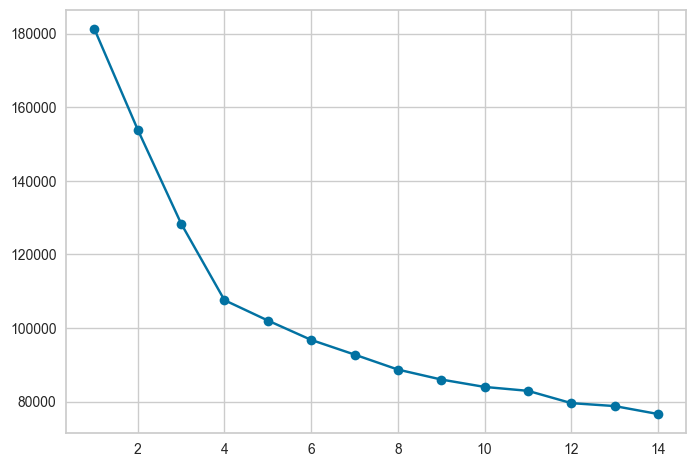

In [1020]:
import matplotlib.pyplot as plt

plt.plot(range(1, 15), List, marker='o')
plt.show()

***Her we see that after the 4th point it slows down and from this point adding more components doesn't significantly increase***

In [1021]:
visualizer = KElbowVisualizer(kmeans, k = (2, 15), timings=True)

KElbowVisualizer(ax=<AxesSubplot: >, estimator=KMeans(n_clusters=14), k=(2, 15))

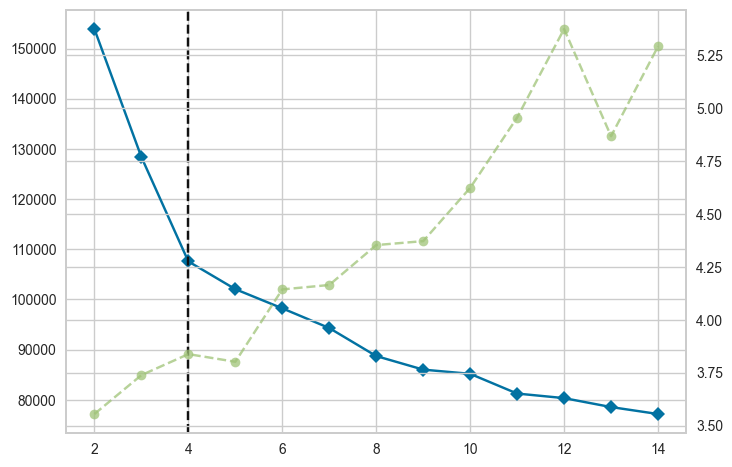

In [1022]:
visualizer.fit(X_scaled_clean)

In [1023]:
visualizer.show()

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

For n_clusters = 2, the silhouette score is 0.35851462906747866)
For n_clusters = 3, the silhouette score is 0.4504435009454978)
For n_clusters = 4, the silhouette score is 0.5545800592218895)
For n_clusters = 5, the silhouette score is 0.45850201389834677)
For n_clusters = 6, the silhouette score is 0.3678961691310434)
For n_clusters = 7, the silhouette score is 0.24066286213458576)
For n_clusters = 8, the silhouette score is 0.16857865973654101)
For n_clusters = 9, the silhouette score is 0.2711895910867919)


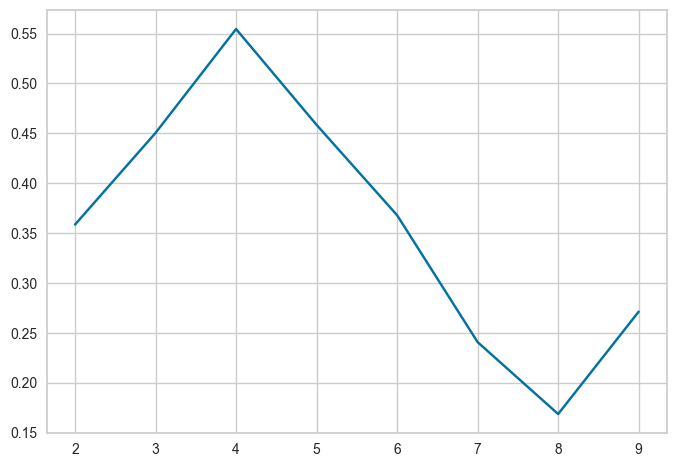

In [1036]:
sil_score = []
cluster_list = list(range(2, 10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, n_init = 'auto')
    preds = clusterer.fit_predict((X_scaled_clean))
    score = silhouette_score(X_scaled_clean, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.show()

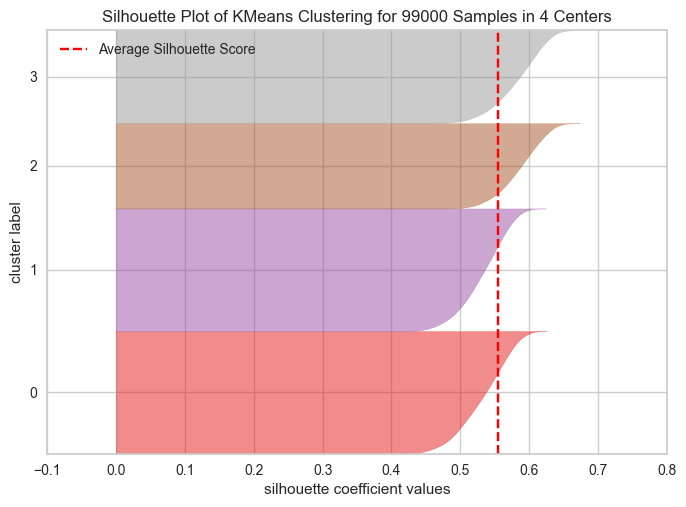

<AxesSubplot: title={'center': 'Silhouette Plot of KMeans Clustering for 99000 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [1038]:
visualizer = SilhouetteVisualizer(KMeans(4,n_init = 'auto', random_state=1))
visualizer.fit(X_scaled_clean)
visualizer.show()

***So now we can be confident and go for the 4 as suggested above***

In [79]:
kmeans_1 = KMeans(n_clusters = 4, n_init = 'auto', random_state=0)

In [80]:
kmeans_1.fit(X_scaled_clean)

KMeans(n_clusters=4, n_init='auto', random_state=0)

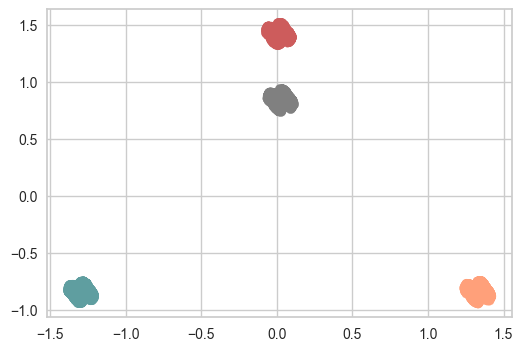

In [81]:
custom_colors = ['indianred', 'cadetblue', 'lightsalmon', 'grey']
cluster_cmap = ListedColormap(custom_colors)

pca = PCA(n_components=2, whiten=True)
pca.fit(X_scaled_clean)
X_scaled_clean['x'] = pca.fit_transform(X_scaled_clean)[:, 0]
X_scaled_clean['y'] = pca.fit_transform(X_scaled_clean)[:, 1]
plt.figure(figsize=(6,4))
plt.scatter(X_scaled_clean['x'], X_scaled_clean['y'], c=kmeans_1.labels_, cmap=cluster_cmap)
plt.show()

In [1032]:
X_scaled_clean['Label'] = kmeans.labels_

In [1033]:
X_scaled_clean

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,x,y,Label
0,0.923316,0.000000,0.679102,0.081612,1.0,1.0,0.9,0.222222,0.000000,0.125,...,0.712329,0.656566,0.598372,0.0,0.0,0.0,1.0,-0.639043,1.551101,3
1,0.683257,0.313725,0.490753,0.745563,0.0,0.0,0.9,0.222222,0.000000,0.125,...,0.041568,0.121212,0.664858,0.0,0.0,0.0,1.0,-0.661770,1.546271,3
2,0.927739,0.117647,0.002690,0.558576,0.0,1.0,0.3,0.222222,0.000000,0.125,...,0.028814,0.585859,0.453189,0.0,0.0,0.0,1.0,-0.628010,1.498330,3
3,0.978305,0.627451,0.401118,0.573459,0.0,0.0,0.9,0.222222,0.000000,0.125,...,0.187530,0.060606,0.670285,0.0,0.0,0.0,1.0,-0.668714,1.525397,3
4,0.532203,0.627451,0.756048,0.271390,0.0,0.0,0.7,0.444444,0.111111,0.125,...,0.309872,0.484848,0.525102,0.0,0.0,0.0,1.0,-0.659928,1.530474,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98995,0.816952,0.000000,0.928451,0.175133,0.0,0.0,0.9,0.111111,0.000000,0.125,...,0.581011,0.393939,0.625509,0.0,0.0,0.0,1.0,-0.660556,1.582092,3
98996,0.634980,0.000000,0.324809,0.459848,1.0,1.0,0.9,0.222222,0.333333,0.125,...,0.055739,0.444444,0.458616,0.0,0.0,0.0,1.0,-0.634010,1.554845,3
98997,0.506642,0.000000,0.800733,0.055204,0.0,1.0,0.1,0.222222,0.000000,0.125,...,0.059518,0.656566,0.628223,0.0,0.0,0.0,1.0,-0.616877,1.513422,3
98998,0.772497,0.686275,0.971738,0.607062,0.0,1.0,0.1,0.222222,0.111111,0.125,...,0.721776,0.646465,0.559023,0.0,0.0,0.0,1.0,-0.635004,1.478345,3
